In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from rcparams import rcparams
mpl.rcParams.update(rcparams)

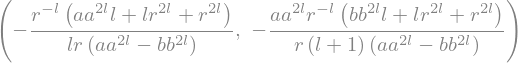

In [2]:
import sympy as sp

# Symbols
l, a, b, r = sp.symbols('l a b r', positive=True)
A_l, B_l = sp.symbols('A_l B_l')

# Equations
eq1 = sp.Eq(l*a**(l-1)/r**(l+1) + l*A_l*a**(l-1) - (l+1)*B_l*a**-(l+2), 0)
eq2 = sp.Eq(-(l+1)*r**(l-1)/b**(l+2) + l*A_l*b**(l-1) - (l+1)*B_l*b**-(l+2), 0)

# Solve
sol = sp.solve([eq1, eq2], (A_l, B_l), dict=True)
A_l_sol = sol[0][A_l]
B_l_sol = sol[0][B_l]

# Try to get the "nicer" form
A_l_sol = sp.factor(sp.together(A_l_sol))
B_l_sol = sp.factor(sp.together(B_l_sol))

# Pretty print
sp.init_printing(use_latex=True)
A_l_sol, B_l_sol

# Exercise 8.4 (b):

We introduced the dimensionless solution for the electric potential 

$$
\tilde{E}_{\rho}
= \frac{1}{1-p^{3}}
  \frac{3 p^{3}\, \tilde{\rho}\tilde{z}}
       {2(\tilde{\rho}^{2}+\tilde{z}^{2})^{5/2}},
$$

$$\tilde{E}_{z}
= -\frac{1}{1-p^{3}}
\left[
1
+ \frac{
2 p^{3}(\tilde{\rho}^{2}+\tilde{z}^{2})^{3/2}
- 3 p^{3}\tilde{z}^{2}
  (\tilde{\rho}^{2}+\tilde{z}^{2})^{1/2}}
{2(\tilde{\rho}^{2}+\tilde{z}^{2})^{3}}
\right]$$

where we have defined the dimensionless parameters:

$$
\tilde{\rho} = \frac{\rho}{b}, \qquad 
\tilde{z} = \frac{z}{b}, \qquad 
\tilde{r} = \sqrt{\tilde{\rho}^{2} + \tilde{z}^{2}},\quad p = \frac{a}{b}
$$

and 

$$
\tilde{E}_{\rho} = \frac{E_{\rho}}{E_{0}}, 
\qquad
\tilde{E}_{z} = \frac{E_{z}}{E_{0}}.
$$

Below, we provide a plot for the lines of the normalized electric force $\vec{E}=-\nabla\Phi$.

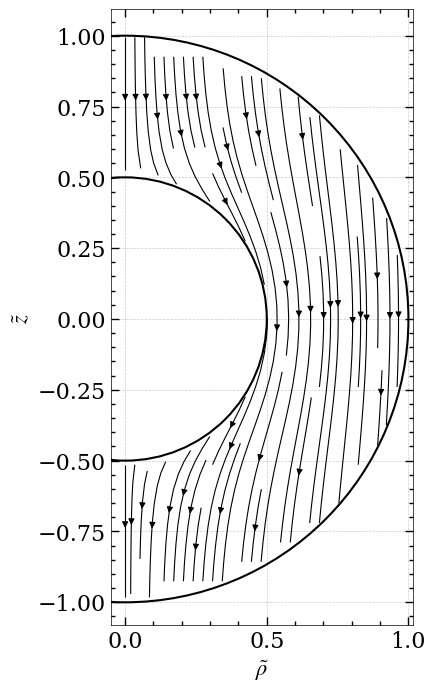

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.5  # a/b
E0 = 1   # scale out of the problem

# Dimensionless domain: rho >= 0
rho = np.linspace(0, 1.2, 400)  # tilde_rho >= 0
z   = np.linspace(-1.2, 1.2, 400)
RHO, Z = np.meshgrid(rho, z)

# Dimensionless radius
R = np.sqrt(RHO**2 + Z**2)

# Mask: only region p < r < 1
mask = (R > p) & (R < 1)

# Avoid dividing by zero
eps = 1e-12
R_safe = np.sqrt(RHO**2 + Z**2 + eps)

# Dimensionless E-field components (from your derivation)
Erho = (3 * p**3 * RHO * Z) / (2 * (1 - p**3) * R_safe**5)
Ez   = - (1/(1 - p**3)) * (1 + (2*p**3*R_safe**3 - 3*p**3*Z**2*R_safe)/(2*R_safe**6))

# Apply mask (NaN outside region)
Erho_masked = np.where(mask, Erho, np.nan)
Ez_masked   = np.where(mask, Ez, np.nan)

# Plot
plt.figure(figsize=(8,8))
plt.streamplot(
    rho, z, Erho_masked, Ez_masked,
    density=1.2, color='black', linewidth=0.8, arrowsize=0.9
)

# Draw spherical shell boundaries
circle_inner = plt.Circle((0,0), p, color='black', fill=False, linewidth=1.5)
circle_outer = plt.Circle((0,0), 1, color='black', fill=False, linewidth=1.5)
plt.gca().add_patch(circle_inner)
plt.gca().add_patch(circle_outer)

plt.gca().set_aspect('equal')
plt.xlabel(r'$\tilde{\rho}$')
plt.ylabel(r'$\tilde{z}$')
#plt.title(r'Dimensionless Electric Field Lines in the Region $p<\tilde r<1$, $p=0.5$')

plt.grid(True, alpha=0.2)
plt.savefig("rhozfield.png", dpi=300)
plt.show()